#11.1 Date and Time Data Types and Tools

The Python standard library includes data types for date and time data, as well as calendar-related functionality

The **datetime.datetime** type, or simply datetime, is widely used:

In [1]:
from datetime import datetime

In [2]:
now = datetime.now()

In [3]:
now

datetime.datetime(2021, 10, 13, 13, 8, 59, 38275)

In [4]:
now.year, now.month, now.day

(2021, 10, 13)

datetime stores both the date and time down to the **microsecond**

**timedelta represents the temporal difference between two datetime objects:**

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [6]:
delta

datetime.timedelta(days=926, seconds=56700)

In [7]:
delta.days

926

In [8]:
delta.seconds

56700

You can **add** (or **subtract**) a timedelta or multiple thereof to a datetime object to yield a new shifted object:

In [9]:
from datetime import timedelta

In [10]:
start = datetime(2011, 1, 7)

In [11]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [12]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

Table 11-1 summarizes the data types in the datetime module



Table 11-1. Types in datetime module
<p align='center'>
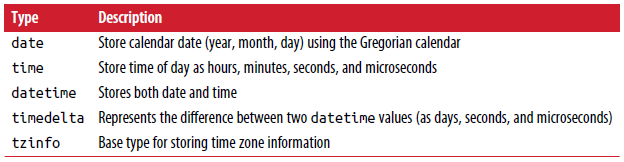
</p>

##Converting Between String and Datetime

You can format **datetime** objects and **pandas Timestamp** objects **as strings** using **str or the strftime** method, passing a format specification: 

In [13]:
stamp = datetime(2011, 1, 3)

In [14]:
str(stamp)

'2011-01-03 00:00:00'

In [15]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

See Table 11-2 for a complete list of the format codes

Table 11-2. Datetime format speciication (ISO C89 compatible)
<p align='center'>
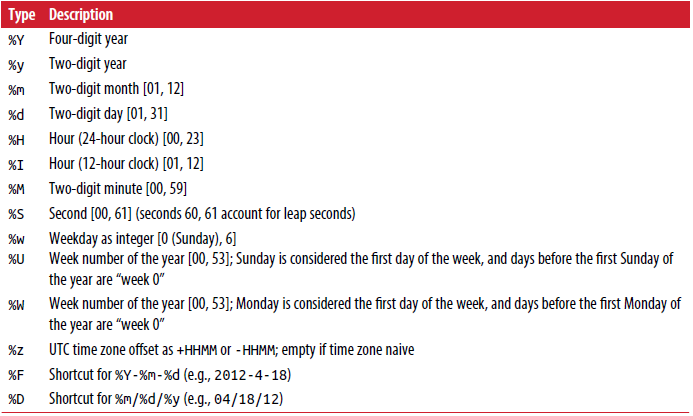
</p>

You can use these same format codes to convert **strings to dates** using date **time.strptime:**

In [16]:
value = '2011-01-03'

In [17]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
datestrs = ['7/6/2011', '8/6/2011']

In [19]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

datetime.strptime is a good way to parse a date with a known format

However, it can be a bit annoying to have to write a format spec each time, especially for **common date formats**

In this case, you can use the **parser.parse** method in the third-party **dateutil** package (this is installed automatically when you install pandas):

In [20]:
from dateutil.parser import parse

In [21]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

dateutil is capable of parsing most human-intelligible date representations

In [22]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

strptimeIn international locales, **day appearing before month** is very common, so you can pass **dayfirst=True** to indicate this:

In [23]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

pandas is generally oriented toward working with arrays of dates, whether used as an axis index or a column in a DataFrame

The **to_datetime** method **parses many different kinds of date representations.** Standard date formats like **ISO 8601** can be parsed very quickly:

In [24]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [25]:
import pandas as pd

In [26]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

It also handles values that should be considered missing (None, empty string, etc.):

In [27]:
idx = pd.to_datetime(datestrs + [None])

In [28]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [29]:
idx[2]

NaT

In [30]:
pd.isnull(idx)

array([False, False,  True])

NaT (Not a Time) is pandas’s null value for timestamp data

**datetime objects also have a number of locale-specific formatting options for systems in other countries or languages**

For example, the abbreviated month names will be different on German or French systems compared with English systems

See Table 11-3 for a listing

Table 11-3. Locale-speciic date formatting
<p align='center'>
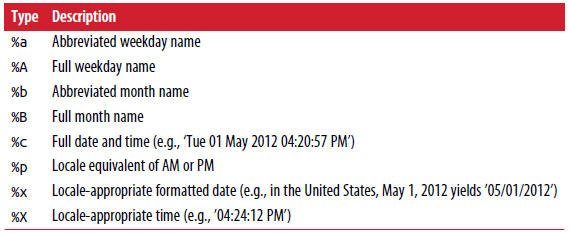
</p>

# 11.2 Time Series Basics

A basic kind of time series object in pandas is a Series **indexed by timestamps,** which is often represented external to pandas as Python strings or datetime objects:

In [31]:
from datetime import datetime
import numpy as np

In [32]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [33]:
ts = pd.Series(np.random.randn(6), index=dates)

In [34]:
ts

2011-01-02   -0.656635
2011-01-05   -0.578852
2011-01-07    0.838191
2011-01-08    0.702067
2011-01-10   -0.735273
2011-01-12   -0.324479
dtype: float64

Under the hood, **these datetime objects have been put in a DatetimeIndex:**

In [35]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

Like other Series, arithmetic operations between differently indexed time series automatically **align on the dates:**

In [36]:
ts + ts[::2]

2011-01-02   -1.313269
2011-01-05         NaN
2011-01-07    1.676382
2011-01-08         NaN
2011-01-10   -1.470546
2011-01-12         NaN
dtype: float64

Recall that ts[::2] selects every second element in ts

**pandas stores timestamps using NumPy’s datetime64 data type** at the nanosecond resolution:

In [37]:
ts.index.dtype

dtype('<M8[ns]')

Scalar values from a DatetimeIndex are **pandas Timestamp** objects:

In [38]:
stamp = ts.index[0]

In [39]:
stamp

Timestamp('2011-01-02 00:00:00')

**A Timestamp can be substituted anywhere you would use a datetime object**

## Indexing, Selection, Subsetting

Time series behaves like any other pandas.Series when you are indexing and selecting data based on label:

In [40]:
stamp = ts.index[2]

In [41]:
ts[stamp]

0.8381910042852627

As a convenience, **you can also pass a string that is interpretable as a date:**

In [42]:
ts['1/10/2011']

-0.7352731897927883

In [43]:
ts['20110110']

-0.7352731897927883

For longer time series, **a year or only a year and month can be passed to easily select slices of data:**

In [44]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))

In [45]:
longer_ts

2000-01-01    0.309904
2000-01-02    1.199237
2000-01-03    0.115070
2000-01-04    1.162453
2000-01-05   -0.484758
                ...   
2002-09-22    0.862645
2002-09-23   -0.982995
2002-09-24   -0.312100
2002-09-25    0.789890
2002-09-26    0.597669
Freq: D, Length: 1000, dtype: float64

In [46]:
longer_ts['2001']

2001-01-01   -1.526209
2001-01-02   -0.302384
2001-01-03    1.277503
2001-01-04    1.642268
2001-01-05   -0.621526
                ...   
2001-12-27   -0.549326
2001-12-28    0.183320
2001-12-29    0.471222
2001-12-30    0.108598
2001-12-31    0.442719
Freq: D, Length: 365, dtype: float64

Here, the string '2001' is interpreted as a year and selects that time period

**This also works if you specify the month:**

In [47]:
longer_ts['2001-05'][:5]

2001-05-01   -0.137261
2001-05-02   -1.124009
2001-05-03   -0.413300
2001-05-04    1.333243
2001-05-05   -0.998473
Freq: D, dtype: float64

**Slicing with datetime objects works as well:**

In [48]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.838191
2011-01-08    0.702067
2011-01-10   -0.735273
2011-01-12   -0.324479
dtype: float64

Because most time series data is ordered chronologically, **you can slice with time stamps not contained in a time series to perform a range query:**

In [49]:
ts

2011-01-02   -0.656635
2011-01-05   -0.578852
2011-01-07    0.838191
2011-01-08    0.702067
2011-01-10   -0.735273
2011-01-12   -0.324479
dtype: float64

In [50]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.838191
2011-01-08    0.702067
2011-01-10   -0.735273
dtype: float64

You can pass either a string date, datetime, or timestamp

Remember that **slicing in this manner produces views on the source time series** like slicing NumPy arrays

This means that no data is copied and **modifications on the slice will be reflected in the original data**

There is an equivalent instance method, **truncate**, that **slices a Series between two dates:**

In [51]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.656635
2011-01-05   -0.578852
2011-01-07    0.838191
2011-01-08    0.702067
dtype: float64

All of this holds true for DataFrame as well, indexing on its rows:

In [52]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [53]:
long_df = pd.DataFrame(np.random.randn(100, 4),
          index=dates,
          columns=['Colorado', 'Texas',
          'New York', 'Ohio'])

In [54]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.840225,-0.796065,0.482181,0.047338
2001-05-09,1.848063,-0.725434,-0.809801,0.595881
2001-05-16,-0.311240,-0.033312,0.441241,-0.583176
2001-05-23,-0.178057,1.877703,0.783187,0.923113
2001-05-30,0.302672,0.378318,-0.326763,-0.642922


## Time Series with Duplicate Indices

In some applications, **there may be multiple data observations falling on a particular timestamp.** Here is an example:

In [55]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])

In [56]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [57]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

We can tell that the index is not unique by checking its is_unique property:

In [58]:
dup_ts.index.is_unique

False

Indexing into this time series will now **either produce scalar values** or **slices depending on whether a timestamp is duplicated:**

In [59]:
dup_ts['1/3/2000'] # not duplicated

4

In [60]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

Suppose you wanted to **aggregate the data having non-unique timestamps**
 
One way to do this is to use **groupby and pass level= 0:**

In [61]:
grouped = dup_ts.groupby(level=0)

In [62]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [63]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 11.3 Date Ranges, Frequencies, and Shifting

**Generic time series** in pandas are assumed to be **irregular;** that is, they have **no fixed frequency**

It’s often desirable to work relative to a fixed frequency, such as daily, monthly, or every 15 minutes, even if that means introducing missing values into a time series

Fortunately pandas has a full suite of standard time series frequencies and tools for **resampling, inferring frequencies, and generating fixed-frequency date ranges**

For example, **you can convert the sample time series to be fixed daily frequency by calling resample:**

In [64]:
ts

2011-01-02   -0.656635
2011-01-05   -0.578852
2011-01-07    0.838191
2011-01-08    0.702067
2011-01-10   -0.735273
2011-01-12   -0.324479
dtype: float64

In [65]:
resampler = ts.resample('D')

The string 'D' is interpreted as daily frequency



## Generating Date Ranges

**pandas.date_range** is responsible for **generating a DatetimeIndex with an indicated length according to a particular frequency:**



In [66]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [67]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

**By default, date_range generates daily timestamps**

If you pass only a **start or end date,** you must pass a number of **periods** to generate:

In [68]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [69]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

The start and end dates define strict boundaries for the generated date index

For example, if you wanted a date index containing the last **business day** of each month, you would pass the **'BM' frequency** and only dates falling on or inside the date interval will be included:



In [70]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

Table 11-4. Base time series frequencies (not comprehensive)
<p align='center'>
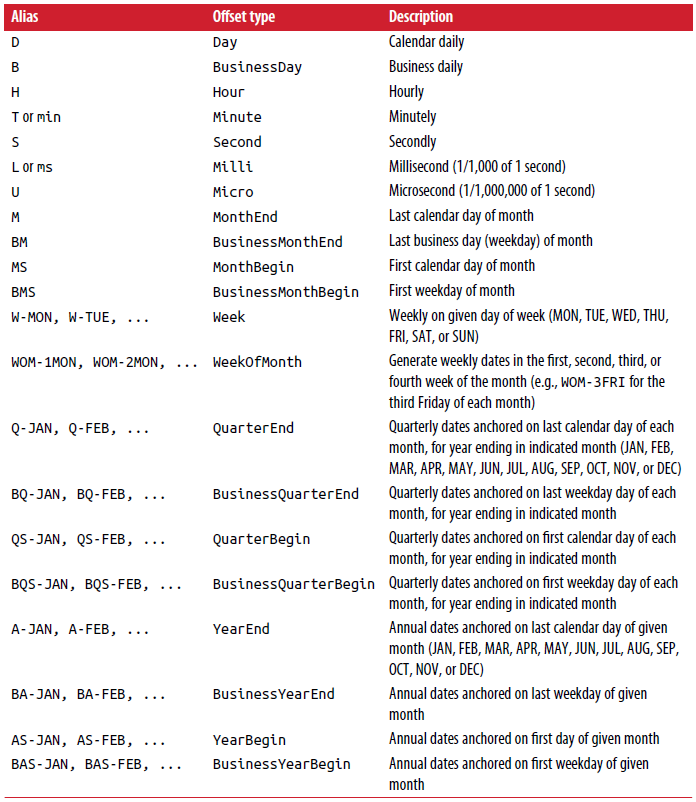
</p>

date_range by default **preserves the time (if any) of the start or end timestamp:**

In [71]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

Sometimes you will have start or end dates with time information but want to generate a set of timestamps **normalized to midnight as a convention**

To do this, there is a normalize option:

In [72]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## Frequencies and Date Offsets

**Frequencies** in pandas are composed of a **base frequency and a multiplier**

**Base frequencies** are typically referred to by a **string alias,** like **'M' for monthly or 'H' for hourly**

For each base frequency, there is an object defined generally referred to as a **date offset**

For example, hourly frequency can be represented with the Hour class:

In [73]:
from pandas.tseries.offsets import Hour, Minute

In [74]:
hour = Hour()

In [75]:
hour

<Hour>

You can define a multiple of an offset by passing an integer:

In [76]:
four_hours = Hour(4)

In [77]:
four_hours

<4 * Hours>

In most applications, you would never need to explicitly create one of these objects, **instead using a string alias like 'H' or ' 4H'**

Putting an **integer before the base frequency** creates a multiple:

In [78]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

Many offsets can be combined together by addition:

In [79]:
Hour(2) + Minute(30)

<150 * Minutes>

Similarly, you can pass frequency strings, like **'1h30min',** that will effectively be parsed to the same expression:

In [80]:
pd.date_range('2001-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 01:30:00',
               '2001-01-01 03:00:00', '2001-01-01 04:30:00',
               '2001-01-01 06:00:00', '2001-01-01 07:30:00',
               '2001-01-01 09:00:00', '2001-01-01 10:30:00',
               '2001-01-01 12:00:00', '2001-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

**Some frequencies describe points in time that are not evenly spaced**

For example, **'M'** (calendar month end) and **'BM'** (last business/weekday of month) depend on the number of days in a month and, **in the latter case, whether the month ends on a weekend or not.** We refer to these as **anchored offsets**

### Week of month dates

One useful frequency class is **“week of month,”** starting with **WOM.** **This enables you to get dates like the third Friday of each month:**

In [81]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [82]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

## Shifting (Leading and Lagging) Data

**“Shifting” refers to moving data backward and forward through time**

Both Series and DataFrame have a **shift method** for doing **naive shifts forward or backward, leaving the index unmodified:**

In [83]:
ts = pd.Series([1, 2, 3, 4],
               index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [84]:
ts

2000-01-31    1
2000-02-29    2
2000-03-31    3
2000-04-30    4
Freq: M, dtype: int64

In [85]:
ts.shift(2)

2000-01-31    NaN
2000-02-29    NaN
2000-03-31    1.0
2000-04-30    2.0
Freq: M, dtype: float64

In [86]:
ts.shift(-2)

2000-01-31    3.0
2000-02-29    4.0
2000-03-31    NaN
2000-04-30    NaN
Freq: M, dtype: float64

When we shift like this, **missing data is introduced either at the start or the end of the time series**

A **common use** of shift is **computing percent changes in a time series or multiple time series** as DataFrame columns. This is expressed as:

In [87]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29    1.000000
2000-03-31    0.500000
2000-04-30    0.333333
Freq: M, dtype: float64

Because naive shifts **leave the index unmodified, some data is discarded**

Thus if the frequency is known, it can be passed to shift to advance the timestamps instead of simply the data:



In [88]:
ts.shift(2, freq='M')

2000-03-31    1
2000-04-30    2
2000-05-31    3
2000-06-30    4
Freq: M, dtype: int64

Other frequencies can be passed, too, giving you some flexibility in how to lead and lag the data:

In [89]:
ts.shift(3, freq='D')

2000-02-03    1
2000-03-03    2
2000-04-03    3
2000-05-03    4
dtype: int64

In [90]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    1
2000-02-29 01:30:00    2
2000-03-31 01:30:00    3
2000-04-30 01:30:00    4
dtype: int64

The T here stands for minutes

## Shifting dates with offsets

The pandas **date offsets** can also be used with **datetime** or **Timestamp** objects:

In [91]:
from pandas.tseries.offsets import Day, MonthEnd

In [92]:
now = datetime(2011, 11, 17)

In [93]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

If you add an **anchored offset** like MonthEnd, **the first increment will “roll forward” a date to the next date according to the frequency rule:**

In [94]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [95]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

**Anchored offsets** can explicitly “roll” dates forward or backward by simply using their **rollforward** and **rollback** methods, respectively:

In [96]:
offset = MonthEnd()

In [97]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [98]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

A creative use of date offsets is to use these methods **with groupby:**

In [99]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [100]:
ts

2000-01-15    1.074963
2000-01-19    1.291447
2000-01-23   -0.434518
2000-01-27    0.323972
2000-01-31   -0.422142
2000-02-04    0.413238
2000-02-08   -1.603798
2000-02-12    0.696636
2000-02-16   -0.949938
2000-02-20   -1.664889
2000-02-24    0.206765
2000-02-28   -0.922434
2000-03-03   -0.219453
2000-03-07   -1.568406
2000-03-11    0.763908
2000-03-15   -1.214899
2000-03-19    1.923262
2000-03-23    1.518375
2000-03-27    1.657645
2000-03-31    1.195224
Freq: 4D, dtype: float64

In [101]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.366745
2000-02-29   -0.546346
2000-03-31    0.506957
dtype: float64

Of course, an easier and faster way to do this is using resample

In [102]:
ts.resample('M').mean()

2000-01-31    0.366745
2000-02-29   -0.546346
2000-03-31    0.506957
Freq: M, dtype: float64

# 11.4 Time Zone Handling

Time zones are expressed as offsets from coordinated universal time **(UTC);**

In Python, time zone information comes from the third-party **pytz library**, which exposes the Olson database, a compilation of world time zone information

This is especially important for historical data because the daylight saving time (DST) transition dates (and even UTC offsets) have been changed numerous times

Time zone names can be found interactively and in the docs:

In [103]:
import pytz

In [104]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

To get a time zone object from pytz, use **pytz.timezone:**

In [105]:
tz = pytz.timezone('America/New_York')

In [106]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

Methods in pandas will accept either time zone names or these objects

## Time Zone Localization and Conversion

By default, **time series in pandas are time zone naive**

For example, consider the following time series:

In [107]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [108]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [109]:
ts

2012-03-09 09:30:00   -0.459853
2012-03-10 09:30:00    0.869004
2012-03-11 09:30:00   -1.101944
2012-03-12 09:30:00    0.795307
2012-03-13 09:30:00   -0.464930
2012-03-14 09:30:00   -2.681382
Freq: D, dtype: float64

The index’s tz field is None:

In [110]:
print(ts.index.tz)

None


**Date ranges can be generated with a time zone set:**

In [111]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

Conversion from naive to localized is handled by the tz_localize method:

In [112]:
ts

2012-03-09 09:30:00   -0.459853
2012-03-10 09:30:00    0.869004
2012-03-11 09:30:00   -1.101944
2012-03-12 09:30:00    0.795307
2012-03-13 09:30:00   -0.464930
2012-03-14 09:30:00   -2.681382
Freq: D, dtype: float64

In [113]:
ts_utc = ts.tz_localize('UTC')

In [114]:
ts_utc

2012-03-09 09:30:00+00:00   -0.459853
2012-03-10 09:30:00+00:00    0.869004
2012-03-11 09:30:00+00:00   -1.101944
2012-03-12 09:30:00+00:00    0.795307
2012-03-13 09:30:00+00:00   -0.464930
2012-03-14 09:30:00+00:00   -2.681382
Freq: D, dtype: float64

In [115]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

**Once a time series has been localized to a particular time zone,** it can be converted to another time zone with **tz_convert:**

In [116]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.459853
2012-03-10 04:30:00-05:00    0.869004
2012-03-11 05:30:00-04:00   -1.101944
2012-03-12 05:30:00-04:00    0.795307
2012-03-13 05:30:00-04:00   -0.464930
2012-03-14 05:30:00-04:00   -2.681382
Freq: D, dtype: float64

In the case of the preceding time series, which **straddles a DST transition** in the America/New_York time zone, we could **localize to EST and convert to, say, UTC or Berlin time:**

In [117]:
ts_eastern = ts.tz_localize('America/New_York')

In [118]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.459853
2012-03-10 14:30:00+00:00    0.869004
2012-03-11 13:30:00+00:00   -1.101944
2012-03-12 13:30:00+00:00    0.795307
2012-03-13 13:30:00+00:00   -0.464930
2012-03-14 13:30:00+00:00   -2.681382
dtype: float64

In [119]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.459853
2012-03-10 15:30:00+01:00    0.869004
2012-03-11 14:30:00+01:00   -1.101944
2012-03-12 14:30:00+01:00    0.795307
2012-03-13 14:30:00+01:00   -0.464930
2012-03-14 14:30:00+01:00   -2.681382
dtype: float64

tz_localize and tz_convert are also **instance methods** on DatetimeIndex:

In [120]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

## Operations with Time Zone Aware Timestamp Objects

Similar to time series and date ranges, individual **Timestamp objects** similarly **can be localized from naive to time zone–aware and converted from one time zone to another:**

In [121]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [122]:
stamp_utc = stamp.tz_localize('utc')

In [123]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

**You can also pass a time zone when creating the Timestamp:**

In [124]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [125]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

**Time zone–aware Timestamp objects internally store a UTC timestamp** value as nano seconds since the **Unix epoch (January 1, 1970)**

This UTC value is **invariant** between time zone conversions:

In [126]:
stamp_utc.value

1299902400000000000

In [127]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

When performing time **arithmetic using pandas’s DateOffset** objects, **pandas respects daylight saving time transitions where possible**

Here we construct time stamps that occur right before DST transitions (forward and backward)

**First, 30 minutes before transitioning to DST:**

In [128]:
from pandas.tseries.offsets import Hour

In [129]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

In [130]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [131]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

**Then, 90 minutes before transitioning out of DST:**

In [132]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

In [133]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [134]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

## Operations Between Diferent Time Zones

**If two time series with different time zones are combined, the result will be UTC**

Since the timestamps are **stored under the hood in UTC,** this is a straightforward operation and **requires no conversion to happen:**

In [135]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [136]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [137]:
ts

2012-03-07 09:30:00    0.343668
2012-03-08 09:30:00    1.378334
2012-03-09 09:30:00   -1.439635
2012-03-12 09:30:00    0.380827
2012-03-13 09:30:00    1.342122
2012-03-14 09:30:00    0.179932
2012-03-15 09:30:00   -1.046320
2012-03-16 09:30:00   -0.083211
2012-03-19 09:30:00   -0.696590
2012-03-20 09:30:00    0.855134
Freq: B, dtype: float64

In [138]:
ts1 = ts[:7].tz_localize('Europe/London')

In [139]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [140]:
result = ts1 + ts2

In [141]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

# 11.5 Periods and Period Arithmetic

**Periods represent timespans,** like days, months, quarters, or years

**The Period class represents this data type,** requiring a string or integer and a frequency from Table 11-4:

In [142]:
p = pd.Period(2007, freq='A-DEC')

In [143]:
p

Period('2007', 'A-DEC')

In this case, the Period object represents the **full timespan from January 1, 2007, to December 31, 2007, inclusive**

Conveniently, **adding and subtracting** integers from periods has the effect of **shifting by their frequency:**

In [144]:
p + 5

Period('2012', 'A-DEC')

In [145]:
p - 2

Period('2005', 'A-DEC')

If two periods have the **same frequency, their difference is the number of units between them:**

In [146]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

Regular ranges of periods can be constructed with the period_range function:

In [147]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

In [148]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

The **PeriodIndex class stores a sequence of periods** and **can serve as an axis index** in any pandas data structure:


In [149]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -1.120144
2000-02   -0.744231
2000-03    0.230413
2000-04   -0.571607
2000-05    0.099623
2000-06   -0.010305
Freq: M, dtype: float64

**If you have an array of strings, you can also use the PeriodIndex class:**

In [150]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [151]:
index = pd.PeriodIndex(values, freq='Q-DEC')

In [152]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

## Period Frequency Conversion

**Periods** and **PeriodIndex** objects **can be converted to another frequency** with their **asfreq** method

As an example, suppose we had an **annual period** and wanted to **convert** it into a **monthly period** either at the start or end of the year

In [153]:
p = pd.Period('2007', freq='A-DEC')

In [154]:
p

Period('2007', 'A-DEC')

In [155]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [156]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

**You can think of Period('2007', 'A-DEC') as being a sort of cursor pointing to a span of time, subdivided by monthly periods.** See Figure 11-1 for an illustration of this. 



Figure 11-1. Period frequency conversion illustration
<p align='center'>
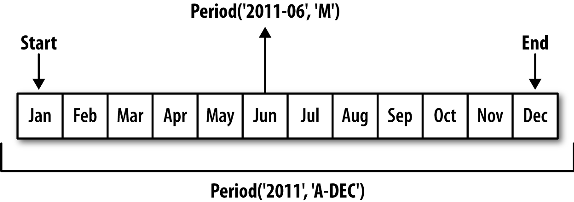
</p>

For a **fiscal year** ending on a month other than December, the corresponding **monthly subperiods are different:**

In [157]:
p = pd.Period('2007', freq='A-JUN')

In [158]:
p

Period('2007', 'A-JUN')

In [159]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [160]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

When you are converting from **high to low frequency,** **pandas determines the superperiod depending on where the subperiod “belongs.”**

**For example, in A-JUN frequency, the month Aug-2007 is actually part of the 2008 period:**

In [161]:
p = pd.Period('Aug-2007', 'M')

In [162]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

**Whole PeriodIndex objects or time series can be similarly converted with the same semantics:**

In [163]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [164]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [165]:
ts

2006   -1.924358
2007    0.020865
2008   -0.242149
2009    0.187996
Freq: A-DEC, dtype: float64

In [166]:
ts.asfreq('M', how='start')

2006-01   -1.924358
2007-01    0.020865
2008-01   -0.242149
2009-01    0.187996
Freq: M, dtype: float64

**Here, the annual periods are replaced with monthly periods corresponding to the first month falling within each annual period**

If we instead wanted the **last business day of each year,** we can use the **'B' frequency** and indicate that we want the end of the period:

In [167]:
ts.asfreq('B', how='end')

2006-12-29   -1.924358
2007-12-31    0.020865
2008-12-31   -0.242149
2009-12-31    0.187996
Freq: B, dtype: float64

## Quarterly Period Frequencies

Quarterly data is standard in accounting, finance, and other fields

Much **quarterly data** is reported relative to a **fiscal year end,** typically the **last calendar or business day of one of the 12 months** of the year

Thus, **the period 2012Q4 has a different meaning depending on fiscal year end** 

**pandas supports all 12 possible quarterly frequencies as Q-JAN through Q-DEC:**

In [168]:
p = pd.Period('2012Q4', freq='Q-JAN') # Q-JAN = Quarter Ends on Janurary

In [169]:
p

Period('2012Q4', 'Q-JAN')

In the case of fiscal year ending in January, **2012Q4 runs from November through January,** which you can check by converting to daily frequency

See Figure 11-2 for an illustration

<p align='center'>
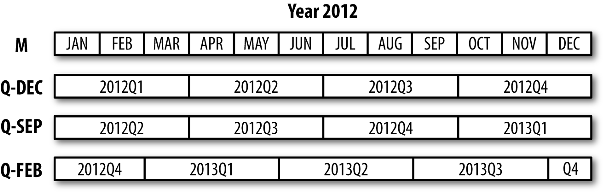
</p>
Figure 11-2. Diferent quarterly frequency conventions

In [170]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [171]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

Thus, it’s **possible to do easy period arithmetic;** for example, **to get the timestamp at 4 PM on the second-to-last business day of the quarter,** you could do:

In [172]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [173]:
p4pm

Period('2012-01-30 16:00', 'T')

In [174]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

You can generate quarterly ranges using period_range. Arithmetic is identical, too:

In [175]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [176]:
ts = pd.Series(np.arange(len(rng)), index=rng)

In [177]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [178]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [179]:
new_rng

PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00'],
            dtype='period[T]', freq='T')

In [180]:
ts.index = new_rng.to_timestamp()

In [181]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

## Converting Timestamps to Periods (and Back)

Series and DataFrame objects **indexed by timestamps** can be **converted to periods with the to_period method:**

In [182]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [183]:
ts = pd.Series(np.random.randn(3), index=rng)

In [184]:
ts

2000-01-31   -1.981311
2000-02-29   -1.054868
2000-03-31    0.246029
Freq: M, dtype: float64

In [185]:
pts = ts.to_period()

In [186]:
pts

2000-01   -1.981311
2000-02   -1.054868
2000-03    0.246029
Freq: M, dtype: float64

Since periods refer to **non-overlapping timespans,** a timestamp **can only belong to a single period for a given frequency**

While the frequency of the new PeriodIndex is inferred from the timestamps by default, **you can specify any frequency you want**

There is also no problem with having duplicate periods in the result:

In [187]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [188]:
ts2 = pd.Series(np.random.randn(6), index=rng)

In [189]:
ts2

2000-01-29   -0.511384
2000-01-30   -0.906188
2000-01-31    1.013559
2000-02-01    1.167096
2000-02-02    1.294025
2000-02-03   -0.763465
Freq: D, dtype: float64

In [190]:
ts2.to_period('M')

2000-01   -0.511384
2000-01   -0.906188
2000-01    1.013559
2000-02    1.167096
2000-02    1.294025
2000-02   -0.763465
Freq: M, dtype: float64

To convert back to timestamps, use **to_timestamp:**

In [191]:
pts = ts2.to_period()

In [192]:
pts

2000-01-29   -0.511384
2000-01-30   -0.906188
2000-01-31    1.013559
2000-02-01    1.167096
2000-02-02    1.294025
2000-02-03   -0.763465
Freq: D, dtype: float64

In [193]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.511384
2000-01-30 23:59:59.999999999   -0.906188
2000-01-31 23:59:59.999999999    1.013559
2000-02-01 23:59:59.999999999    1.167096
2000-02-02 23:59:59.999999999    1.294025
2000-02-03 23:59:59.999999999   -0.763465
Freq: D, dtype: float64

## Creating a PeriodIndex from Arrays

**Fixed frequency datasets are sometimes stored with timespan information spread across multiple columns**

For example, in this macroeconomic dataset, **the year and quarter are in different columns:**

In [194]:
!mkdir examples

In [195]:
import urllib.request
url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/macrodata.csv'
filename = 'examples/macrodata.csv'
urllib.request.urlretrieve(url, filename)

('examples/macrodata.csv', <http.client.HTTPMessage at 0x7fb36544b1d0>)

In [196]:
data = pd.read_csv('examples/macrodata.csv')

In [197]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [198]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [199]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

**By passing these arrays to PeriodIndex with a frequency, you can combine them to form an index for the DataFrame:**

In [200]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')

In [201]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [202]:
data.index = index

In [203]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# 11.6 Resampling and Frequency Conversion

**Resampling refers to the process of converting a time series from one frequency to another**

Aggregating **higher frequency data to lower frequency** is called **downsampling,** while converting **lower frequency to higher frequency is called upsampling**

Not all resampling falls into either of these categories; for example, converting **W-WED (weekly on Wednesday) to W-FRI is neither upsampling nor downsampling**

pandas objects are equipped with a **resample method,** which is the workhorse function for all frequency conversion

resample has a **similar API to groupby;** you call **resample to group the data, then call an aggregation function:**

In [204]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

In [205]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [206]:
ts

2000-01-01   -0.069332
2000-01-02   -1.765695
2000-01-03    0.264047
2000-01-04    2.080696
2000-01-05    0.616639
                ...   
2000-04-05   -1.976680
2000-04-06    0.310256
2000-04-07    0.210728
2000-04-08   -1.138108
2000-04-09   -0.139361
Freq: D, Length: 100, dtype: float64

In [207]:
ts.resample('M').mean()

2000-01-31   -0.114660
2000-02-29   -0.172519
2000-03-31   -0.048501
2000-04-30   -0.013965
Freq: M, dtype: float64

In [208]:
ts.resample('M', kind='period').mean()

2000-01   -0.114660
2000-02   -0.172519
2000-03   -0.048501
2000-04   -0.013965
Freq: M, dtype: float64

resample is a flexible and high-performance method that **can be used to process very large time series**

Table 11-5 summarizes some of its options

Table 11-5. Resample method arguments
<p align='center'>
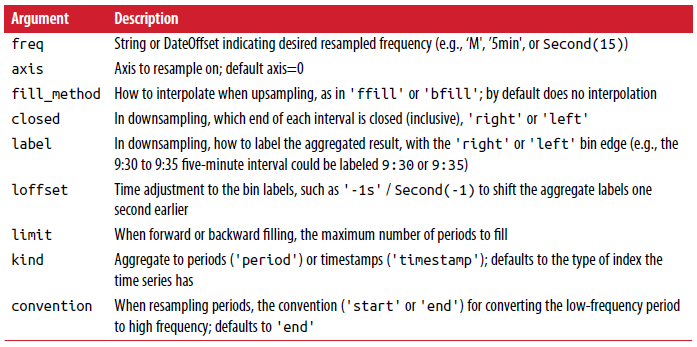
</p>

## Downsampling

Aggregating data to a regular, lower frequency is a pretty normal time series task. **The data you’re aggregating doesn’t need to be fixed frequently**

The **desired frequency defines bin edges that are used to slice the time series into pieces to aggregate**

For example, to convert to monthly, 'M' or ' BM', you need to chop up the data into one month intervals

**Each interval is said to be half-open; a data point can only belong to one interval, and the union of the intervals must make up the whole time frame**

There are a couple things to think about when using resample to downsample data:

* **Which side of each interval is closed**

* **How to label each aggregated bin, either with the start of the interval or the end**

To illustrate, let’s look at some one-minute data:

In [209]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

In [210]:
ts = pd.Series(np.arange(12), index=rng)

In [211]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

Suppose you wanted to aggregate this data into **five-minute chunks** or bars by taking the sum of each group:

In [212]:
ts.resample('5min').sum() # 00:10:00 is Inclusive

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

The frequency you pass defines bin edges in five-minute increments

**By default, the left bin edge is inclusive, so the 00:00 value is included in the 00:00 to 00:05 interval**

Passing closed='right' changes the interval to be closed on the right:

In [213]:
ts.resample('5min', closed='right').sum() # 00:10:00 is Exclusive

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

The resulting time series is **labeled by the timestamps from the left side of each bin**

By passing label='right' you can label them with the **right bin edge:**

In [214]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

See Figure 11-3 for an illustration of minute frequency data being resampled to five minute frequency

<p align='center'>
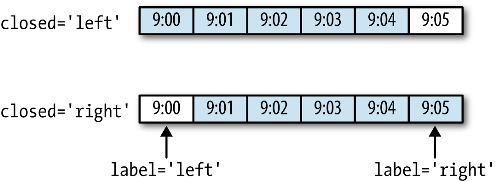
</p>
Figure 11-3. Five-minute resampling illustration of closed, label conventions


Lastly, you might want to **shift the result index by some amount,** say **subtracting one second from the right edge** to make it more clear which interval the timestamp refers to

To do this, pass a string or date offset to loffset:

In [215]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

You also could have accomplished the effect of loffset by calling the shift method on the result without the loffset

### Open-High-Low-Close (OHLC) resampling

In finance, a popular way to aggregate a time series is to compute four values for each bucket: the first (open), last (close), maximum (high), and minimal (low) values

By using the **ohlc aggregate function** you will obtain a DataFrame having columns containing these four aggregates, which are efficiently computed in a single sweep of the data:

In [216]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


## Upsampling and Interpolation

When converting from a low frequency to a higher frequency, no aggregation is needed

Let’s consider a DataFrame with some weekly data:

In [217]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [218]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.918364,-0.961995,1.659911,0.246272
2000-01-12,0.177831,-1.477370,0.314519,-1.580419


When you are using an aggregation function with this data, there is only **one value per group, and missing values result in the gaps**

We use the **asfreq method to convert to the higher frequency without any aggregation:**

In [219]:
df_daily = frame.resample('D').asfreq()

In [220]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.918364,-0.961995,1.659911,0.246272
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.177831,-1.477370,0.314519,-1.580419


**Suppose you wanted to fill forward each weekly value on the non-Wednesdays**

The same filling or interpolation methods available in the fillna and reindex methods are available for resampling:

In [221]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.918364,-0.961995,1.659911,0.246272
2000-01-06,-0.918364,-0.961995,1.659911,0.246272
2000-01-07,-0.918364,-0.961995,1.659911,0.246272
2000-01-08,-0.918364,-0.961995,1.659911,0.246272
2000-01-09,-0.918364,-0.961995,1.659911,0.246272
2000-01-10,-0.918364,-0.961995,1.659911,0.246272
2000-01-11,-0.918364,-0.961995,1.659911,0.246272
2000-01-12,0.177831,-1.477370,0.314519,-1.580419


You can similarly choose to only fill a certain number of periods forward to limit how far to continue using an observed value:

In [222]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.918364,-0.961995,1.659911,0.246272
2000-01-06,-0.918364,-0.961995,1.659911,0.246272
2000-01-07,-0.918364,-0.961995,1.659911,0.246272
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.177831,-1.477370,0.314519,-1.580419


**Notably, the new date index need not overlap with the old one at all:**

In [223]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.918364,-0.961995,1.659911,0.246272
2000-01-13,0.177831,-1.477370,0.314519,-1.580419


## Resampling with Periods

**Resampling data indexed by periods is similar to timestamps:**

In [224]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [225]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.242492,0.432531,-0.115874,0.773989
2000-02,1.649841,-0.059797,0.112501,0.123470
2000-03,2.353234,-0.420470,-0.207342,-0.340556
2000-04,-0.254775,0.681888,-0.380040,0.717321
2000-05,-1.109543,-1.441460,0.157597,-0.083193


In [226]:
annual_frame = frame.resample('A-DEC').mean()

In [227]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.388838,-0.303241,0.136470,0.376389
2001,0.234437,0.146547,0.132705,0.022118


Upsampling is more nuanced, as you **must make a decision about which end of the timespan in the new frequency to place the values before resampling,** just like the asfreq method

**The convention argument defaults to 'start' but can also be 'end':**

In [228]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.388838,-0.303241,0.136470,0.376389
2000Q2,0.388838,-0.303241,0.136470,0.376389
2000Q3,0.388838,-0.303241,0.136470,0.376389
2000Q4,0.388838,-0.303241,0.136470,0.376389
2001Q1,0.234437,0.146547,0.132705,0.022118
2001Q2,0.234437,0.146547,0.132705,0.022118
2001Q3,0.234437,0.146547,0.132705,0.022118
2001Q4,0.234437,0.146547,0.132705,0.022118


In [229]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.388838,-0.303241,0.136470,0.376389
2001Q1,0.388838,-0.303241,0.136470,0.376389
2001Q2,0.388838,-0.303241,0.136470,0.376389
2001Q3,0.388838,-0.303241,0.136470,0.376389
2001Q4,0.234437,0.146547,0.132705,0.022118


Since **periods refer to timespans,** the rules about upsampling and downsampling are more rigid:

* **In downsampling, the target frequency must be a subperiod of the source frequency**

* **In upsampling, the target frequency must be a superperiod of the source frequency**

In upsampling, the target frequency must be a superperiod of the source frequency

For example, the timespans defined by Q-MAR only line up with A-MAR, A-JUN, A-SEP, and A-DEC:

In [230]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.388838,-0.303241,0.136470,0.376389
2001Q1,0.388838,-0.303241,0.136470,0.376389
2001Q2,0.388838,-0.303241,0.136470,0.376389
2001Q3,0.388838,-0.303241,0.136470,0.376389
2001Q4,0.234437,0.146547,0.132705,0.022118
2002Q1,0.234437,0.146547,0.132705,0.022118
2002Q2,0.234437,0.146547,0.132705,0.022118
2002Q3,0.234437,0.146547,0.132705,0.022118


# 11.7 Moving Window Functions

An important class of array transformations used for time series operations are **statistics and other functions** evaluated over a **sliding window or with exponentially decaying weights.** This can be useful for smoothing **noisy** or gappy data

I call these **moving window functions,** even though it includes functions without a fixed-length window like exponentially weighted moving average

Like other statistical functions, these also automatically exclude missing data

Before digging in, we can load up some time series data and resample it to business day frequency:

In [231]:
import urllib.request
url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/stock_px_2.csv'
filename = 'examples/stock_px_2.csv'
urllib.request.urlretrieve(url, filename)

('examples/stock_px_2.csv', <http.client.HTTPMessage at 0x7fb365014e10>)

In [232]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)

In [233]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [235]:
close_px = close_px.resample('B').ffill()

I now introduce the **rolling operator,** which behaves similarly to resample and groupby

**It can be called on a Series or DataFrame along with a window** (expressed as a number of periods; see Figure 11-4 for the plot created):

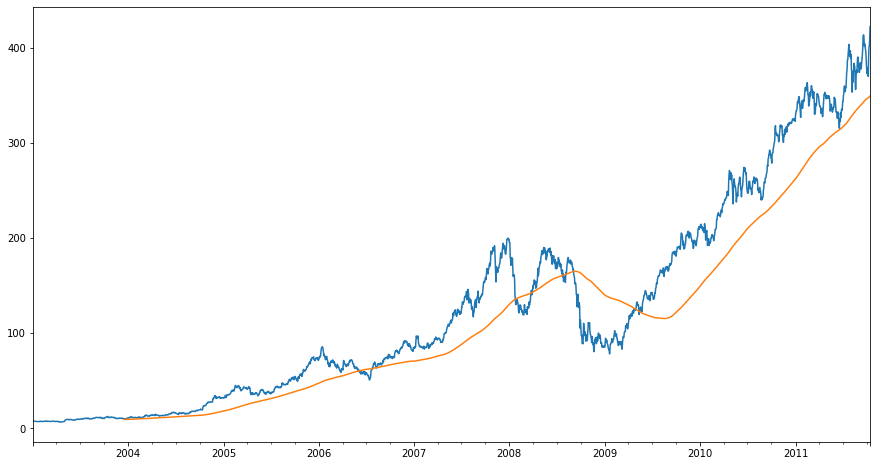

In [239]:
close_px.AAPL.plot(figsize=(15, 8))
close_px.AAPL.rolling(250).mean().plot()

Figure 11-4. Apple Price with 250-day MA

The expression rolling(250) is **similar in behavior to groupby,** but instead of grouping it **creates an object that enables grouping over a 250-day sliding window**

So here we have the 250-day moving window average of Apple’s stock price

By default rolling functions require all of the values in the window to be non-NA

**This behavior can be changed to account for missing data** and, in particular, the fact that you will have fewer than window periods of data at the beginning of the time series (see Figure 11-5):

In [240]:
aapl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [241]:
 aapl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

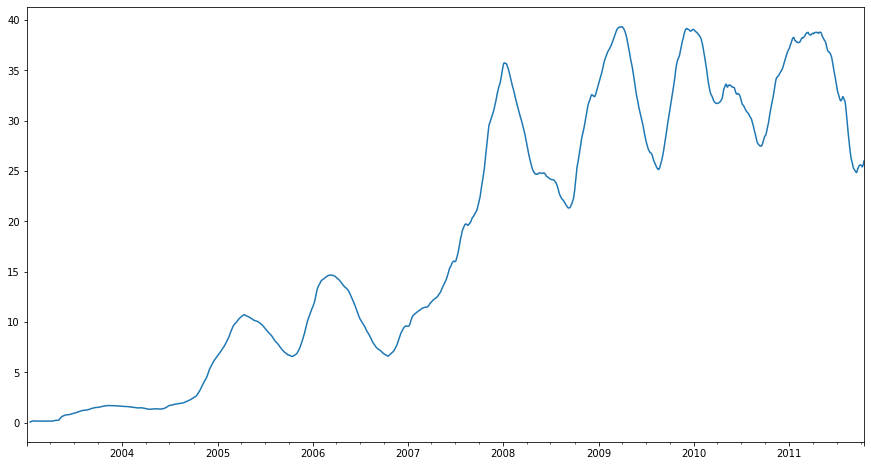

In [243]:
aapl_std250.plot(figsize=(15, 8))

Figure 11-5. Apple 250-day daily return standard deviation

In order to compute an **expanding window mean**, use the **expanding operator** instead of rolling

**The expanding mean starts the time window from the beginning of the time series and increases the size of the window until it encompasses the whole series**

An expanding window mean on the apple_std250 time series looks like this:

In [245]:
expanding_mean = aapl_std250.expanding().mean()

Calling a moving window function on a DataFrame applies the transformation to each column (see Figure 11-6):

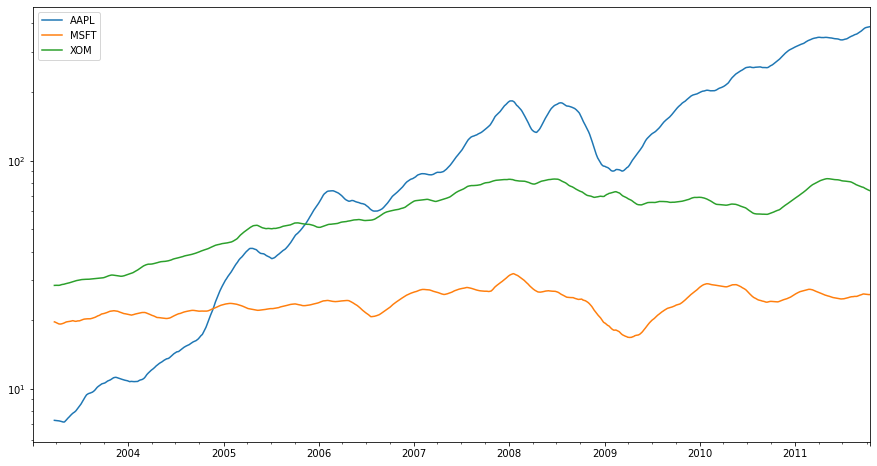

In [249]:
close_px.rolling(60).mean().plot(logy=True, figsize=(15, 8))

Figure 11-6. Stocks prices 60-day MA (log Y-axis)

The rolling function also accepts a **string indicating a fixed-size time offset** rather than a set number of periods

Using this notation can be useful **for irregular time series.** These are the same strings that you can pass to resample

For example, we could compute a 20-day rolling mean like so:

In [250]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


## Exponentially Weighted Functions

An alternative to using a static window size with equally weighted observations is to specify a **constant decay factor to give more weight to more recent observations**

There are a couple of ways to specify the decay factor. A popular one is **using a span,** which **makes the result comparable to a simple moving window function with window size equal to the span**

Since an exponentially weighted statistic places more weight on more recent observations, it “adapts” **faster to changes** compared with the equal-weighted version

pandas has the **ewm operator** to go along with **rolling and expanding** 

Here’s an example comparing a 60-day moving average of Apple’s stock price with an EW mov ing average with span=60 (see Figure 11-7):

In [251]:
aapl_px = close_px.AAPL['2006':'2007']

In [252]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [253]:
ewma60 = aapl_px.ewm(span=30).mean()

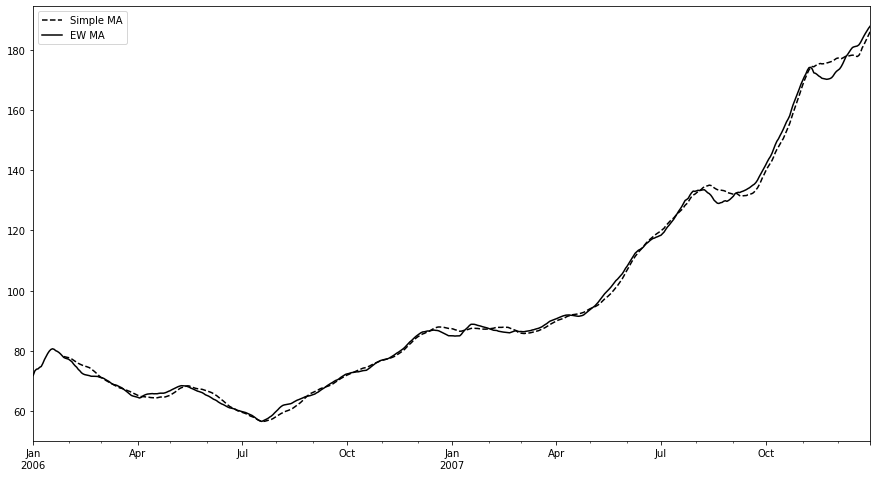

In [258]:
import matplotlib.pyplot as plt
ma60.plot(style='k--', label='Simple MA', figsize=(15, 8))
ewma60.plot(style='k-', label='EW MA')
plt.legend()

Figure 11-7. Simple moving average versus exponentially weighted

## Binary Moving Window Functions

Some statistical operators, like correlation and covariance, need to operate on two time series

As an example, financial analysts are often interested in a stock’s correlation to a benchmark index like the S&P 500

To have a look at this, we first compute the percent change for all of our time series of interest:



In [259]:
spx_px = close_px_all['SPX']

In [260]:
spx_rets = spx_px.pct_change()

In [261]:
returns = close_px.pct_change()

The corr aggregation function after we call rolling can then compute the rolling correlation with spx_rets (see Figure 11-8 for the resulting plot):

In [262]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

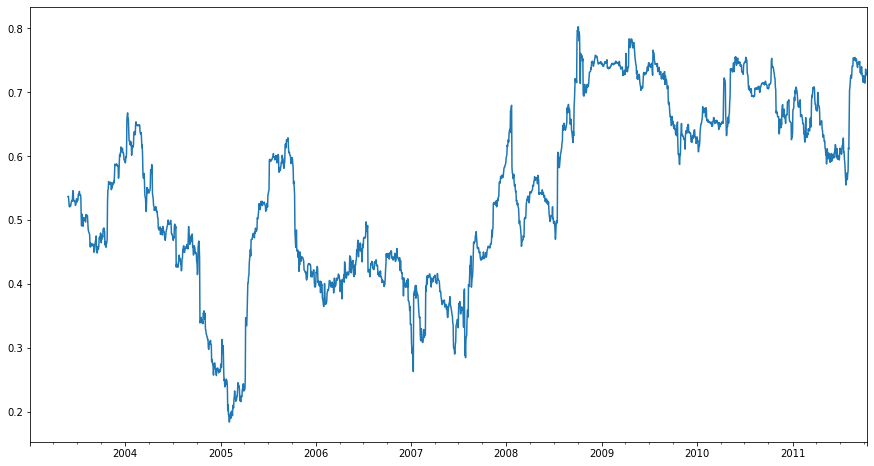

In [263]:
corr.plot(figsize=(15, 8))

Figure 11-8. Six-month AAPL return correlation to S&P 500

Suppose you wanted to compute the correlation of the S&P 500 index with many stocks at once, writing a loop and creating a new DataFrame would be easy but might get repetitive

So if you pass a Series and a DataFrame, a function like rolling_corr will compute the correlation of the Series (spx_rets, in this case) with each column in the DataFrame (see Figure 11-9 for the plot of the result):

In [264]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

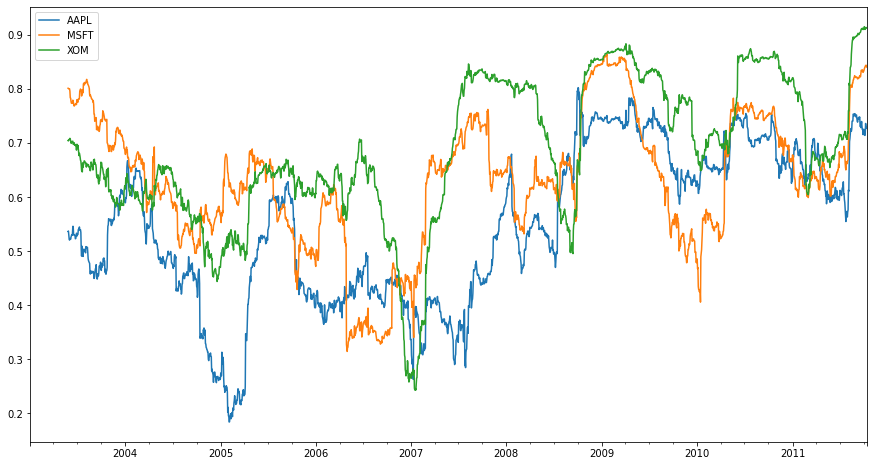

In [265]:
corr.plot(figsize=(15, 8))

Figure 11-9. Six-month return correlations to S&P 500

## User-Deined Moving Window Functions

The **apply method on rolling and related methods** provides a means to apply an array function of your own devising over a moving window

**The only requirement is that the function produce a single value (a reduction) from each piece of the array**

For example, while we can compute sample quantiles using rolling(...).quantile(q), we might be interested in the percentile rank of a particular value over the sample

The scipy.stats.percentileofscore function does just this (see Figure 11-10 for the resulting plot):

In [266]:
from scipy.stats import percentileofscore

In [267]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [268]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

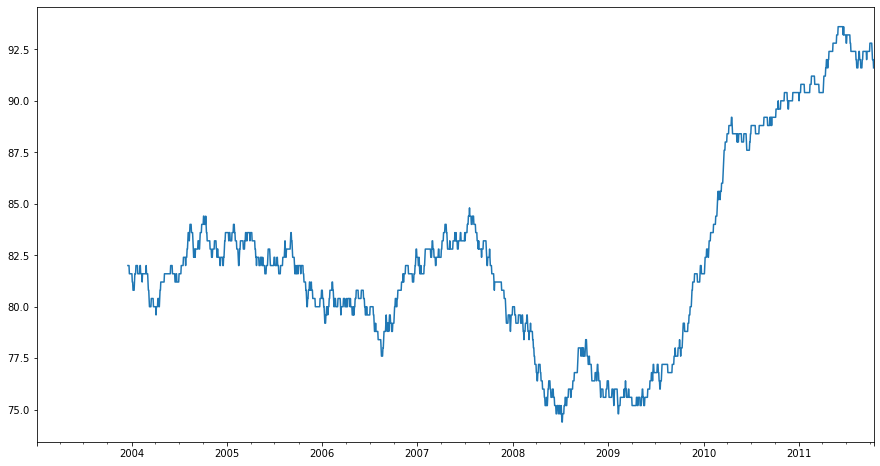

In [269]:
result.plot(figsize=(15, 8))

Figure 11-10. Percentile rank of 2% AAPL return over one-year window